In [1]:
# Image Classification Project

In [30]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sn
%matplotlib inline
import matplotlib.pyplot as plt

In [32]:
os.chdir(r'C:\Users\prafulla.kamble\Downloads\0PRK\ML\CodeBasicsRepo\DataScience\ImageClassificationProjectPK\model')

In [33]:
img = cv2.imread('./test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

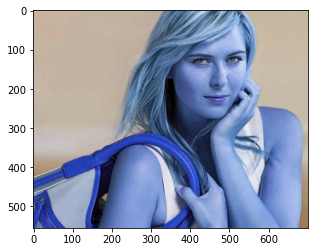

In [34]:
plt.imshow(img)

In [35]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

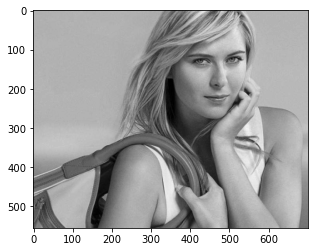

In [36]:
plt.imshow(gray,cmap='gray')

In [37]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

In [38]:
faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[352,  38, 233, 233]], dtype=int32)

In [39]:
(x,y,w,h) = faces[0]

In [40]:
x

352

In [41]:
y

38

In [42]:
w

233

In [43]:
h

233

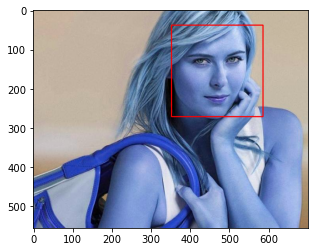

In [44]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)  # (255,0,0) RGB
plt.imshow(face_img)

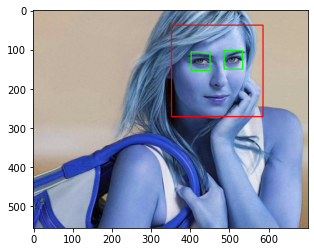

In [45]:
cv2.destroyAllWindows()

for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]  # Region Of Interest
    roi_color = face_img[y:y+h,x:x+w]
    
    eyes = eye_cascade.detectMultiScale(roi_gray)
    
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()    

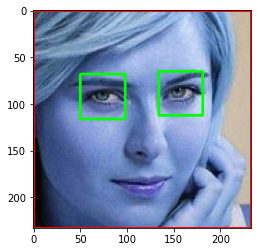

In [46]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

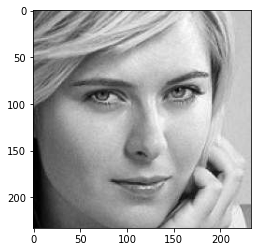

In [47]:
%matplotlib inline
plt.imshow(roi_gray,cmap='gray')

In [76]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
#     print("IMAGE...", img)
#     print("image_path",image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

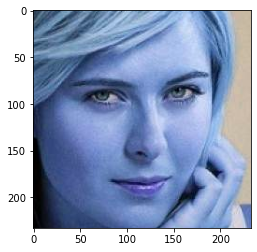

In [91]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/sharapova1.jpg')
plt.imshow(cropped_image)

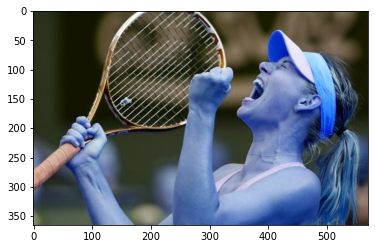

In [92]:
org_image_obstructed = cv2.imread('./test_images/sharapova2.jpg')
plt.imshow(org_image_obstructed)

In [72]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [73]:
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [78]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [79]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

cropped
lionel_messi
Generating cropped images in folder:  ./dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in folder:  ./dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder:  ./dataset/cropped/serena_williams
virat_kohli
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


In [88]:
import pywt
import cv2
from pywt import wavedec2

In [97]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

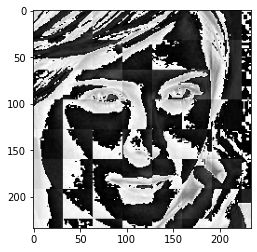

In [98]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [101]:
celebrity_file_names_dict.pop('cropped')

[]

In [102]:
class_dict = {}
count = 0

for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1

class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [108]:
X = []
y = []

for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scaled_img_har = cv2.resize(img_har,(32,32))
        
        # stack cropped image and wavelet image vertically
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),
                                  scaled_img_har.reshape(32*32,1)))

        X.append(combined_img)
        y.append(class_dict[celebrity_name])
        
        
        
        

In [110]:
len(X) # All the images in dataset folder

164

In [116]:
len(X[0]) # = 32*32*3 + 32*32

4096

In [120]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(164, 4096)

### Model training

In [121]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [123]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
pipe = Pipeline([('scaler',StandardScaler()), 
                 ('svc',SVC(kernel='rbf',C= 10))])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=10))])

In [124]:
pipe.score(X_test,y_test)

0.8292682926829268

In [125]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.90      0.90      0.90        10
           2       0.50      0.75      0.60         4
           3       0.67      1.00      0.80         6
           4       1.00      0.79      0.88        14

    accuracy                           0.83        41
   macro avg       0.81      0.83      0.80        41
weighted avg       0.88      0.83      0.84        41



### Fine tuning with GridSearch CV

In [126]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [129]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params': {
            'svc__C':[1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [136]:
scores = []
best_estimators = {}

for algo,mp in model_params.items():
    pipe = make_pipeline(StandardScaler(),mp['model'])
    clf = GridSearchCV(pipe,mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params':clf.best_params_        
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df    

,model,best_score,best_params
0,svm,0.845000,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.698667,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.804000,{'logisticregression__C': 1}


In [138]:
best_estimators['svm'].score(X_test,y_test)

0.9024390243902439

In [139]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9024390243902439

In [140]:
best_estimators['random_forest'].score(X_test,y_test)

0.6585365853658537

In [142]:
best_clf = best_estimators['svm']

In [143]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[ 7,  0,  0,  0,  0],
       [ 0,  9,  0,  1,  0],
       [ 0,  0,  3,  1,  0],
       [ 0,  0,  0,  6,  0],
       [ 0,  1,  1,  0, 12]], dtype=int64)

Text(69.0, 0.5, 'Truth')

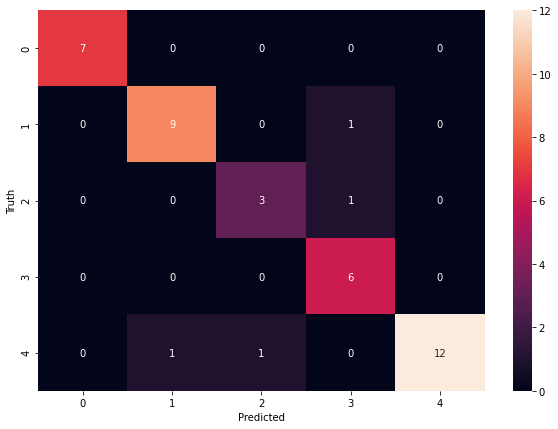

In [144]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [145]:
import joblib

In [146]:
joblib.dump(best_clf,'ImageClassificationModel.pkl')

['ImageClassificationModel.pkl']

In [149]:
import json
with open("ImageClassificationClassDictionary.json",'w') as f:
    f.write(json.dumps(class_dict))